In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Martingale Strategy (No Restrictions)
Application of the martingale strategy without any restrictions. Under the strategy, the individual will start with a bet of \\$1, doubling the bet each time a loss is encountered, otherwise continuing with the \\$1 bet.

This simulation will involve playing games of roulette (red/black or even/odd) with 1:1 payout. The win rate of one round is 48.6%. There will be 10,000 trials running (think of it as 10,000 possible outcomes) with each trial playing 1000 rounds of roulette.

In [2]:
result = pd.DataFrame()
for i in range(10000):
    bet = 1
    currentWealth = 0
    wealthTimeSeries = [0]
    for j in range(1000):
        randomNumber = random.uniform(0, 1)
        if randomNumber > 0.486:
            currentWealth -= bet
            wealthTimeSeries.append(currentWealth)
            bet *= 2
        else:
            currentWealth += bet
            bet = 1
            wealthTimeSeries.append(currentWealth)
    result[i] = wealthTimeSeries

In [3]:
result.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,-1,1,...,1,1,-1,-1,1,1,-1,1,1,-1
2,0,0,2,2,2,0,0,2,-3,2,...,2,0,-3,-3,0,0,-3,0,0,1
3,-2,2,3,1,1,2,-2,1,-7,1,...,1,2,-7,1,-2,-2,-7,2,2,2
4,2,3,4,-1,-1,1,2,-1,-15,3,...,-1,3,1,2,-6,-6,1,3,1,1


### Visualising the evolution of wealth across 1000 roulette games for 10,000 trials
This shows the time series of the individual's wealth as he plays up to 1000 roulette games. While the overall earnings as at the 1000th game seems to be mostly in the range of $49, there are points where the wealth can be largely negative.

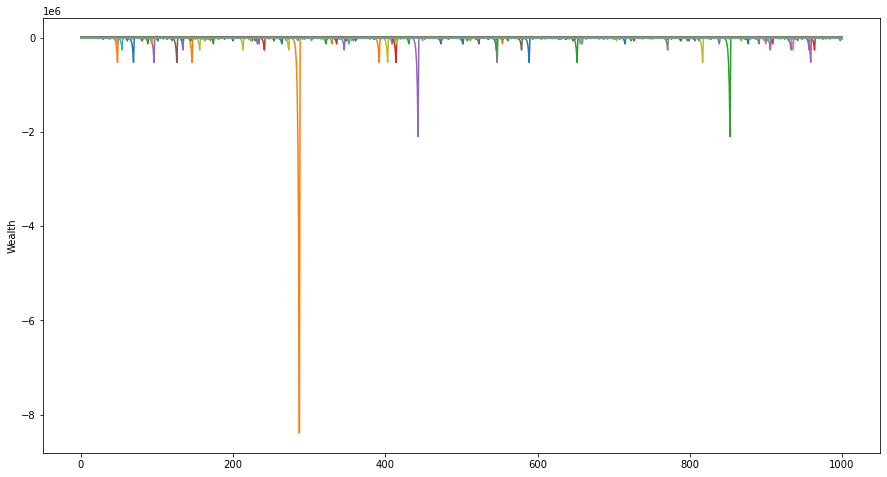

In [4]:
plt.figure(figsize=(15,8))
plt.plot(result)
plt.ylabel('Wealth')
plt.show()

### Visualising the ending wealth of 10,000 trials
It looks like the majority of the ending wealth after playing 100 rounds of roulettes lie around $49.

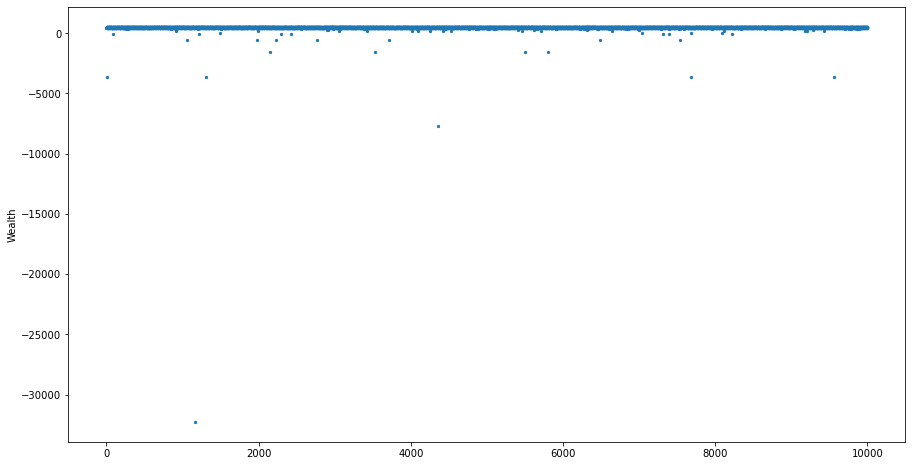

In [5]:
lastRow = result.iloc[-1]
plt.figure(figsize=(15,8))
plt.scatter(lastRow.index, lastRow, s=5)
plt.ylabel('Wealth')
plt.show()

### Visualising the average wealth across all trials at each point in time
Here, it can be seen that the strategy has an upward drift. Theoretically, this looks good as it means the strategy is able to generate a positive return over a period of time.

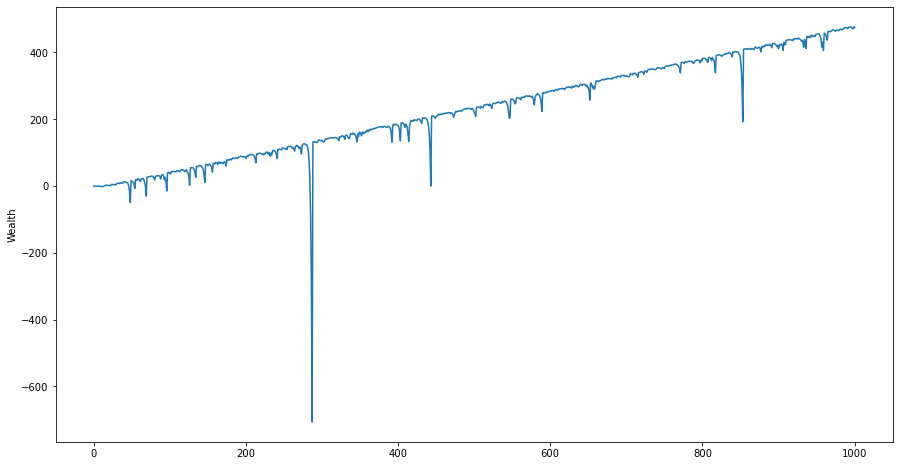

In [6]:
meanValues = result.apply(lambda x: x.mean(), axis=1)
plt.figure(figsize=(15,8))
plt.ylabel('Wealth')
plt.plot(meanValues)
plt.show()

# Martingale Strategy (Restricted Wealth)
However, there are many reasons why the martingale strategy sets the individual up for failure. In this section, we assume the individual has a limited amount of money in his bank and is unable to play once he reaches a wealth of -$100,000.

In [7]:
maxLosses = -100000

In [8]:
result = pd.DataFrame()
for i in range(10000):
    bet = 1
    currentWealth = 0
    wealthTimeSeries = [0]
    for j in range(1000):
        randomNumber = random.uniform(0, 1)
        if currentWealth <= maxLosses:
            wealthTimeSeries.append(currentWealth)
        elif randomNumber > 0.486:
            currentWealth -= bet
            wealthTimeSeries.append(currentWealth)
            bet *= 2
        else:
            currentWealth += bet
            bet = 1
            wealthTimeSeries.append(currentWealth)
    result[i] = wealthTimeSeries

### Visualising the evolution of wealth across 10,000 roulette games for 1,000 trials
There's a lot more colour here as the scales are different. As the wealth hits the lower limit of -$100,000, the wealth remains constant, signifying an exit of the roulette game.

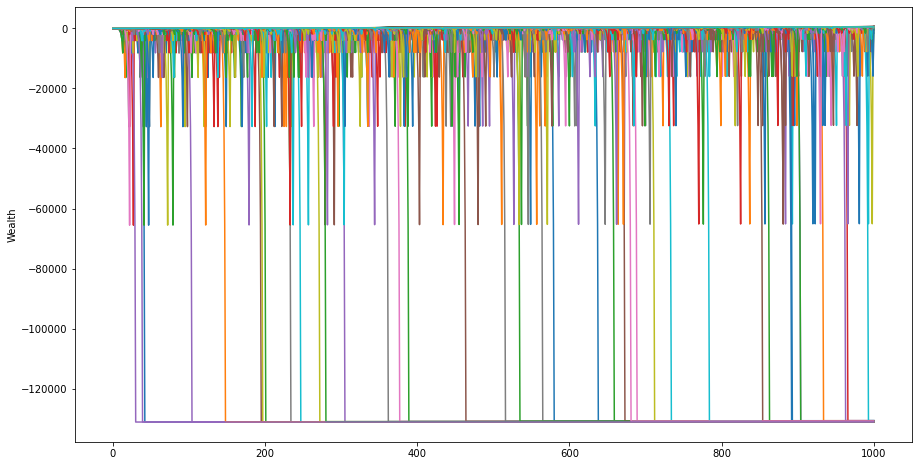

In [9]:
plt.figure(figsize=(15,8))
plt.plot(result)
plt.ylabel('Wealth')
plt.show()

### Visualising the ending wealth of 10,000 trials
It can be seen that there are a number of trials where an "exit at a loss" situation is encountered.

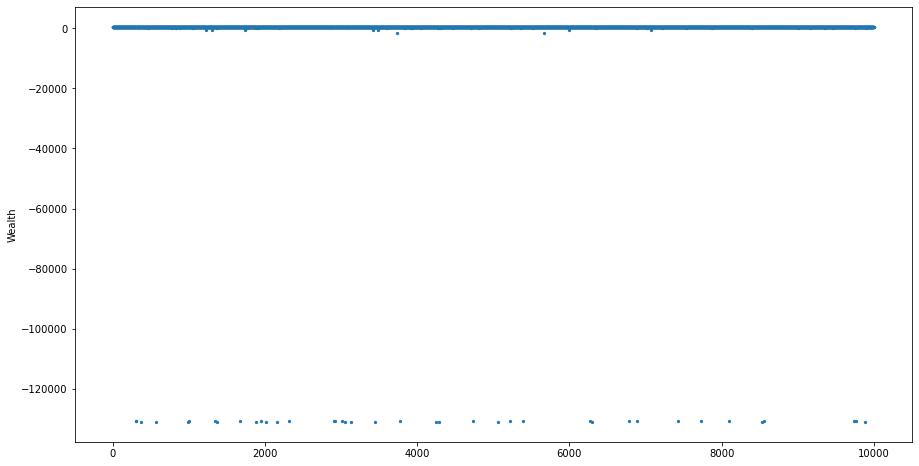

In [10]:
lastRow = result.iloc[-1]
plt.figure(figsize=(15,8))
plt.scatter(lastRow.index, lastRow, s=5)
plt.ylabel('Wealth')
plt.show()

The number of games exited at a loss (out of 1,000 trials):

In [11]:
sum(lastRow<maxLosses)

39

### Visualising the average wealth across all trials at each point in time
With a restriction in place, the average wealth across all the trials at each point of time is decreasing. Unlike the above scenario, with the restrictions, the martingale strategy seems to lead to an eventual loss.

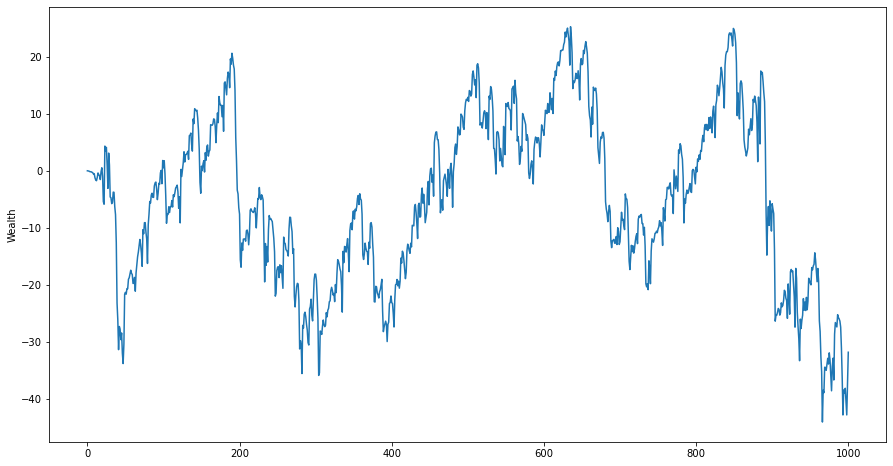

In [12]:
meanValues = result.apply(lambda x: x.mean(), axis=1)
plt.figure(figsize=(15,8))
plt.ylabel('Wealth')
plt.plot(meanValues)
plt.show()